In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
# Load the housing dataset
housing_df = pd.read_csv("./Resources/kc_house_data.csv")
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Inspect the data
housing_df["zipcode"].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [28]:
#Inspect the data types
housing_df.dtypes

bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
price          float64
yr_built         int64
zipcode          int64
dtype: object

In [7]:
housing_df["price"].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [13]:
# Selecting columns I am interested in
columns = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price', 'yr_built', 'zipcode']
housing_df = housing_df.loc[:, columns]
housing_df.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price,yr_built,zipcode
0,3,1.00,1180,5650,1.0,221900.0,1955,98178
1,3,2.25,2570,7242,2.0,538000.0,1951,98125
2,2,1.00,770,10000,1.0,180000.0,1933,98028
3,4,3.00,1960,5000,1.0,604000.0,1965,98136
4,3,2.00,1680,8080,1.0,510000.0,1987,98074
5,4,4.50,5420,101930,1.0,1225000.0,2001,98053
6,3,2.25,1715,6819,2.0,257500.0,1995,98003
7,3,1.50,1060,9711,1.0,291850.0,1963,98198
8,3,1.00,1780,7470,1.0,229500.0,1960,98146
9,3,2.50,1890,6560,2.0,323000.0,2003,98038


In [35]:
# Establish the spending price bins and group names.
price_bins = [0, 300000, 600000, 1000000, 10000000]
# group_names = ["<$300K", "$300K-600K", "$600K-1M", "$1M>"]
group_names = [0,1,2,3]

housing_df['bin']=pd.cut(housing_df.price,bins=price_bins, labels=group_names)
housing_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price,yr_built,zipcode,bin
0,3,1.00,1180,5650,1.0,221900.0,1955,98178,0
1,3,2.25,2570,7242,2.0,538000.0,1951,98125,1
2,2,1.00,770,10000,1.0,180000.0,1933,98028,0
3,4,3.00,1960,5000,1.0,604000.0,1965,98136,2
4,3,2.00,1680,8080,1.0,510000.0,1987,98074,1
...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,360000.0,2009,98103,1
21609,4,2.50,2310,5813,2.0,400000.0,2014,98146,1
21610,2,0.75,1020,1350,2.0,402101.0,2009,98144,1
21611,3,2.50,1600,2388,2.0,400000.0,2004,98027,1


In [ ]:
housing_df.groupby(['bin']).count()

In [36]:
# Pick the features for modeling
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'yr_built', 'zipcode']
X = housing_df.loc[:, features]
y = housing_df.loc[:, ['bin']]

In [37]:
# Split the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [38]:
# Import the ML model
from sklearn.tree import DecisionTreeRegressor

In [39]:
# Make an instance of the model
reg = DecisionTreeRegressor(max_depth = 2, random_state = 0)

In [40]:
# Train the model on the data, storing the information learned from the data
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [21]:
# Learning to predict for multiple observations
reg.predict(X_test[0:10])

array([ 345402.72239518, 1355588.61375661,  686990.35594457,
        686990.35594457,  686990.35594457,  345402.72239518,
        345402.72239518,  345402.72239518,  345402.72239518,
        345402.72239518])

In [22]:
X_test.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price,yr_built,zipcode
17384,2,1.5,1430,1650,3.0,297000.0,1999,98125


In [41]:
# Predicting for 1 observation.
reg.predict(X_test.iloc[0].values.reshape(1,-1))

array([0.68387574])

In [42]:
from sklearn.tree import DecisionTreeClassifier

clf = clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

# Train the model on the data
clf.fit(X_train, y_train)

# Predict labels of unseen (test) data
clf.predict(X_test)

array([1, 3, 1, ..., 2, 1, 1], dtype=int64)

[Text(167.4, 181.2, 'X[5] <= 350250.0\ngini = 0.998\nsamples = 16209\nvalue = [1, 1, 1 ... 1, 1, 1]'),
 Text(83.7, 108.72, 'X[5] <= 349995.0\ngini = 0.993\nsamples = 5044\nvalue = [1, 1, 1 ... 0, 0, 0]'),
 Text(41.85, 36.23999999999998, 'gini = 0.993\nsamples = 4919\nvalue = [1, 1, 1 ... 0, 0, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 125\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(251.10000000000002, 108.72, 'X[5] <= 425295.0\ngini = 0.997\nsamples = 11165\nvalue = [0, 0, 0 ... 1, 1, 1]'),
 Text(209.25, 36.23999999999998, 'gini = 0.98\nsamples = 2235\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(292.95, 36.23999999999998, 'gini = 0.997\nsamples = 8930\nvalue = [0, 0, 0 ... 1, 1, 1]')]

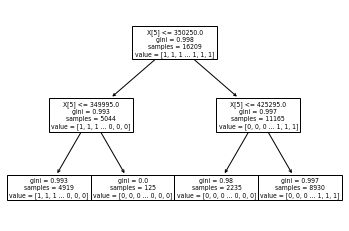

In [26]:
tree.plot_tree(clf)

In [27]:
# Make tree more readable
# Is this where I set the ranges? 
# price =
# fn = price
# cn = 
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# save the figure
# fig.savefig('testtree.png')

NameError: name 'fn' is not defined